<img src="https://www.bestdesigns.co/uploads/inspiration_images/4350/990__1511457498_404_walmart.png" alt="WALMART LOGO" />

# Walmart : predict weekly sales

## Company's Description 📇

Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores from the United States, headquartered in Bentonville, Arkansas. The company was founded by Sam Walton in 1962.

## Project 🚧

Walmart's marketing service has asked you to build a machine learning model able to estimate the weekly sales in their stores, with the best precision possible on the predictions made. Such a model would help them understand better how the sales are influenced by economic indicators, and might be used to plan future marketing campaigns.

## Goals 🎯

The project can be divided into three steps:

- Part 1 : make an EDA and all the necessary preprocessings to prepare data for machine learning
- Part 2 : train a **linear regression model** (baseline)
- Part 3 : avoid overfitting by training a **regularized regression model**

## Scope of this project 🖼️

For this project, you'll work with a dataset that contains information about weekly sales achieved by different Walmart stores, and other variables such as the unemployment rate or the fuel price, that might be useful for predicting the amount of sales. The dataset has been taken from a Kaggle competition, but we made some changes compared to the original data. Please make sure that you're using **our** custom dataset (available on JULIE). 🤓

## Deliverable 📬

To complete this project, your team should:

- Create some visualizations
- Train at least one **linear regression model** on the dataset, that predicts the amount of weekly sales as a function of the other variables
- Assess the performances of the model by using a metric that is relevant for regression problems
- Interpret the coefficients of the model to identify what features are important for the prediction
- Train at least one model with **regularization (Lasso or Ridge)** to reduce overfitting


## Helpers 🦮

To help you achieve this project, here are a few tips that should help you:

### Part 1 : EDA and data preprocessing

Start your project by exploring your dataset : create figures, compute some statistics etc...

Then, you'll have to make some preprocessing on the dataset. You can follow the guidelines from the *preprocessing template*. There will also be some specific transformations to be planned on this dataset, for example on the *Date* column that can't be included as it is in the model. Below are some hints that might help you 🤓

 #### Preprocessing to be planned with pandas

 **Drop lines where target values are missing :**
 - Here, the target variable (Y) corresponds to the column *Weekly_Sales*. One can see above that there are some missing values in this column.
 - We never use imputation techniques on the target : it might create some bias in the predictions !
 - Then, we will just drop the lines in the dataset for which the value in *Weekly_Sales* is missing.

**Create usable features from the *Date* column :**
The *Date* column cannot be included as it is in the model. Either you can drop this column, or you will create new columns that contain the following numeric features :
- *year*
- *month*
- *day*
- *day of week*

**Drop lines containing invalid values or outliers :**
In this project, will be considered as outliers all the numeric features that don't fall within the range : $[\bar{X} - 3\sigma, \bar{X} + 3\sigma]$. This concerns the columns : *Temperature*, *Fuel_price*, *CPI* and *Unemployment*



**Target variable/target (Y) that we will try to predict, to separate from the others** : *Weekly_Sales*

 **------------**

 #### Preprocessings to be planned with scikit-learn

 **Explanatory variables (X)**
We need to identify which columns contain categorical variables and which columns contain numerical variables, as they will be treated differently.

 - Categorical variables : Store, Holiday_Flag
 - Numerical variables : Temperature, Fuel_Price, CPI, Unemployment, Year, Month, Day, DayOfWeek

### Part 2 : Baseline model (linear regression)
Once you've trained a first model, don't forget to assess its performances on the train and test sets. Are you satisfied with the results ?
Besides, it would be interesting to analyze the values of the model's coefficients to know what features are important for the prediction. To do so, the `.coef_` attribute of scikit-learn's LinearRegression class might be useful. Please refer to the following link for more information 😉 https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

### Part 3 : Fight overfitting
In this last part, you'll have to train a **regularized linear regression model**. You'll find below some useful classes in scikit-learn's documentation :
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso

**Bonus question**

In regularized regression models, there's a hyperparameter called *the regularization strength* that can be fine-tuned to get the best generalized predictions on a given dataset. This fine-tuning can be done thanks to scikit-learn's GridSearchCV class : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Also, you'll find here some examples of how to use GridSearchCV together with Ridge or Lasso models : https://alfurka.github.io/2018-11-18-grid-search/

In [136]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff

from sklearn.discriminant_analysis import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import accuracy_score, r2_score, ConfusionMatrixDisplay, mean_squared_error, mean_absolute_error

# 1. EDA and data preprocessing

## 1.1. Cleaning the data

In [137]:
df = pd.read_csv("https://julie-resources.s3.eu-west-3.amazonaws.com/full-stack-full-time/projects-supervised-machine-learning-ft/walmart-sales-ft/Walmart_Store_sales.csv")

In [138]:
print(f'Number of rows: {df.shape[0]}\n')
print(f'Number of columns: {df.shape[1]}\n')
print("Display of df:\n")
display(df.head())
print()
print('Basics statistics:\n')
display(df.describe(include='all'))
print()
print('Percentage of missing values:\n')
missing_percentage = df.isnull().sum() * 100 / len(df)
display(missing_percentage)

Number of rows: 150

Number of columns: 8

Display of df:



,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092



Basics statistics:



,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000



Percentage of missing values:



Store            0.000000
Date            12.000000
Weekly_Sales     9.333333
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
dtype: float64

**Lowercasing column names for easier manipulation :**


In [139]:
df.columns = df.columns.str.lower()

 **Dropping rows where target value is missing :**

In [140]:
df = df.dropna(subset = "weekly_sales")

**Create usable features from the *Date* column :**

In [141]:
df["date"] = pd.to_datetime(df["date"], dayfirst=True)
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day
df["day_of_week"] = df["date"].dt.dayofweek
df = df.drop("date", axis=1)

**Drop lines containing invalid values or outliers :**

In [142]:
columns = ["temperature", "fuel_price", "cpi", "unemployment"]
for column in columns:
    mean = df[column].mean()
    std = df[column].std()
    df = df.drop(df[(df[column] < mean - 3*std) | (df[column] > mean + 3*std)].index)

In [143]:
df.head()

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month,day,day_of_week
0,6.0,1572117.54,NaN,59.61,3.045,214.777523,6.858,2011.0,2.0,18.0,4.0
1,13.0,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011.0,3.0,25.0,4.0
3,11.0,1244390.03,0.0,84.57,NaN,214.556497,7.346,NaN,NaN,NaN,NaN
4,6.0,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010.0,5.0,28.0,4.0
5,4.0,1857533.70,0.0,NaN,2.756,126.160226,7.896,2010.0,5.0,28.0,4.0


## 1.2. EDA

Wha is the weekly sales distribution?

In [144]:
fig = px.box(df["weekly_sales"],
             title = "Distribution of weekly sales")
fig.show()

How do sales evolve throughout each year?

In [145]:
monthly_sales = df.groupby(["month", "year"]).sum().reset_index()
fig = px.line(monthly_sales,
        x = "month",
        y = "weekly_sales",
        color = "year",
        labels = {
            "month" : "Month",
            "weekly_sales" : "Sales"
        },
        title = "Total monthly sales per year")

fig.show()

Sales tend to be highest at the end of the year. Other than that, there is no definite trend that can be identified for all 3 years.

Do some stores make more sales than others?

In [146]:
store_sales = df.groupby(["store"]).sum().reset_index()

fig = px.bar(store_sales,
        x = "store",
        y = "weekly_sales",
        color = "store",
        color_discrete_sequence = "Bold",
        labels = {
            "store" : "Store",
            "weekly_sales" : "Sales"
        },
        title = "Sales per store")

fig.show()

In [147]:
df["store"].value_counts()

3.0     12
18.0    10
14.0     9
1.0      9
13.0     9
7.0      8
19.0     8
5.0      8
2.0      8
17.0     7
6.0      6
8.0      6
4.0      6
20.0     5
10.0     5
15.0     4
16.0     4
9.0      4
11.0     3
Name: store, dtype: int64

Some stores, like n°2, 13 & 14,  made way more sales than others over the 3-year period. There is no data for store n° 12 which is why there are no recorded sales.

In [148]:
fig = px.scatter(df,
                 x='cpi',
                 y='weekly_sales',
                 trendline="ols",
                 labels = {
                    "cpi" : "Consumer Price Index",
                    "weekly_sales" : "Weekly sales"
                 },
                 title='Weekly sales / CPI')
fig.show()

Weekly sales seem to have a tendancy to decrease when CPI increases.

**NB** :  

CPI : price of a weighted average market basket of consumer goods and services purchased by households

In [149]:
fig = px.scatter(df,
                 x='temperature',
                 y='weekly_sales',
                 trendline="ols",
                 labels = {
                    "temperature" : "Temperature",
                    "weekly_sales" : "Weekly sales"
                 },
                 title='Weekly sales / Temperature')
fig.show()

It seems weekly sales tend to decrease as temperature increases.

In [150]:
fig = px.scatter(df,
                 x='fuel_price',
                 y='weekly_sales',
                 trendline="ols",
                 labels = {
                    "fuel_price" : "Fuel price",
                    "weekly_sales" : "Weekly sales"
                    },
                 title='Weekly sales / fuel price')
fig.show()

Likewise, there doesn't seem to be significant influence of fuel price over weekly sales.

Are sales higher on holidays?

In [151]:
holiday = df.groupby("holiday_flag")["weekly_sales"].mean().reset_index()
holiday["holiday_flag"] = holiday["holiday_flag"].apply(lambda x : "Non-holiday" if x == 0.0
                                                        else "Holiday")

fig = px.bar(holiday,
             x = "holiday_flag",
             y = "weekly_sales",
             color = "holiday_flag",
             labels = {
                "holiday_flag" : "Period",
                "weekly_sales" : "Weekly sales"
             },
             title = "Average weekly sales during holidays and non-holidays")
fig.show()

Average weekly sales are notably higher during holidays.

Finally, we'll check out the correlation between all of our datasets variables.

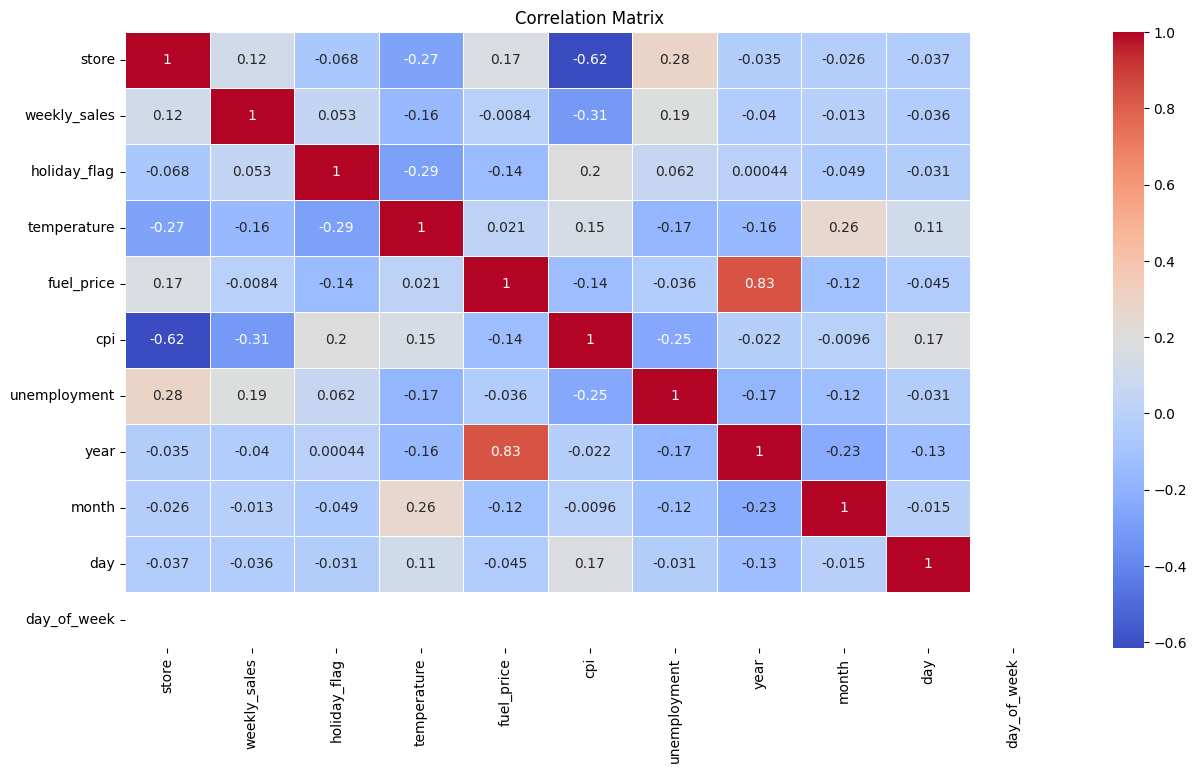

In [152]:
correlation_matrix = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

From the correlation matrix, the variable most correlated are CPI (negatively correlated), unemployment, temperature and store.

It's also worth noting that there are no values in the "day_of_week" rows.

In [153]:
df["day_of_week"].value_counts()

4.0    113
Name: day_of_week, dtype: int64

After inspection, it appears there is only one value in the entire column : we can imagine weekly sales are recorded every Thursday!

In [154]:
df = df.drop("day_of_week", axis = 1)

## 1.3. Data preprocessing

In [155]:
print("Separating labels from features...")
target_name = "weekly_sales"
features_list = [c for c in df.columns if c != target_name]

X = df.loc[:,features_list]
y = df.loc[:,target_name]
print("...Done.")


categorical_features = ['store', 'holiday_flag']
numeric_features = ['temperature', 'fuel_price', 'cpi', 'unemployment', 'year', 'month', 'day']

Separating labels from features...
...Done.


In [156]:
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("...Done.\n")

categorical_transformer = Pipeline(
    steps=[
    ('encoder', OneHotEncoder(drop='first')),
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ])

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy='mean'))
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("Performing preprocessings on the features...")
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)
print("...Done.")

Dividing into train and test sets...
...Done.

Performing preprocessings on the features...
...Done.


# 2. Training a baseline model (linear regression)

In [157]:
print("Train model...")
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [158]:
print("R2 score on training set : ", regressor.score(X_train, Y_train))
print("R2 score on test set : ", regressor.score(X_test, Y_test))

R2 score on training set :  0.9733207488112249
R2 score on test set :  0.9355830197393348


We are getting good R2 scores on train and test set.

In [162]:
scores = cross_val_score(regressor,X_train, Y_train, cv=10)
avg = scores.mean()
std = scores.std()
print('Cross-validated accuracy : {}\nstandard deviation : {}'.format(avg, std))

Cross-validated accuracy : 0.9384167020115122
standard deviation : 0.043258396554433164


Cross-validated accuracy gives us a good score with very small standard deviation.

What are each feature's respective coefficients in the baseline model?

In [159]:
column_names = []
for name, pipeline, features_list in preprocessor.transformers_:
    if name == 'num':
        features = features_list
    else:
        features = pipeline.named_steps['encoder'].get_feature_names_out()
    column_names.extend(features)

coefs = pd.DataFrame(index = column_names, data = regressor.coef_.transpose(), columns=["coefficients"]).abs().sort_values(by="coefficients", ascending=False)
coefs

,coefficients
store_5.0,1.409957e+06
store_3.0,1.258720e+06
store_9.0,1.254306e+06
store_16.0,1.113462e+06
store_7.0,8.856705e+05
store_8.0,7.605317e+05
store_14.0,7.246853e+05
store_15.0,6.775399e+05
store_17.0,6.742479e+05
store_10.0,6.714610e+05


In [168]:
column_names = []
for name, pipeline, features_list in preprocessor.transformers_:
    if name == 'num':
        features = features_list
    else:
        features = pipeline.named_steps['encoder'].get_feature_names_out()
    column_names.extend(features)

coefs = pd.DataFrame(index = column_names, data = regressor.coef_.transpose(), columns=["coefficients"])
coefs.abs().sort_values(by="coefficients", ascending=False)

,coefficients
store_5.0,1.409957e+06
store_3.0,1.258720e+06
store_9.0,1.254306e+06
store_16.0,1.113462e+06
store_7.0,8.856705e+05
store_8.0,7.605317e+05
store_14.0,7.246853e+05
store_15.0,6.775399e+05
store_17.0,6.742479e+05
store_10.0,6.714610e+05


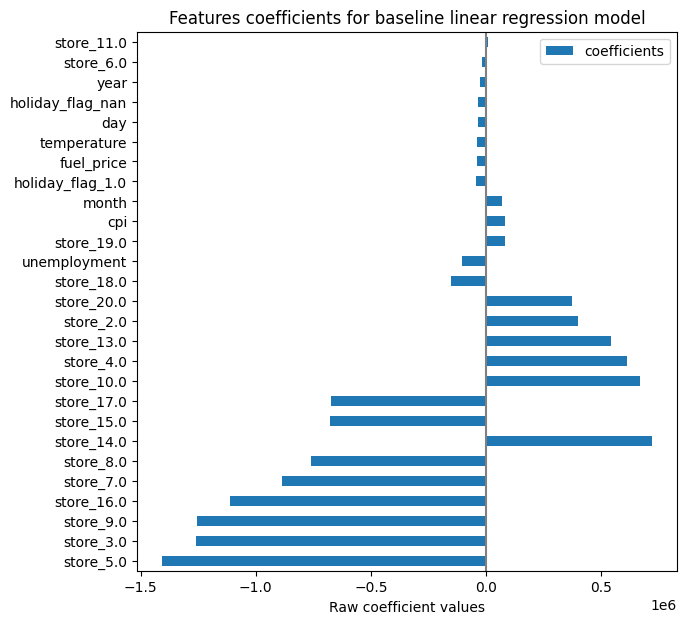

In [171]:
coef_sorted = coefs.reindex(coefs['coefficients'].abs().sort_values(ascending=False).index)
coef_sorted.plot.barh(figsize=(9, 7))
plt.title("Features coefficients for baseline linear regression model")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

# 3. Fight overfitting by training a regularized regression model

## 3.1. Ridge model

In [163]:
ridge = Ridge()

params = {
    'alpha': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
}

gridsearch_ridge = GridSearchCV(ridge, param_grid = params, cv = 10, verbose=1)
gridsearch_ridge.fit(X_train, Y_train)

print("...Done.")
print("Best hyperparameters : ", gridsearch_ridge.best_params_)
print("Best R2 score : ", gridsearch_ridge.best_score_)
print("R2 score on training set : ", gridsearch_ridge.score(X_train, Y_train))
print("R2 score on test set : ", gridsearch_ridge.score(X_test, Y_test))

Fitting 10 folds for each of 9 candidates, totalling 90 fits
...Done.
Best hyperparameters :  {'alpha': 0.01}
Best R2 score :  0.9385942138321092
R2 score on training set :  0.9733027363035629
R2 score on test set :  0.9368753775646367


Scores with the Ridge model are practically identical to our baseline model, and the gap between train and test accuracy has not been reduced.

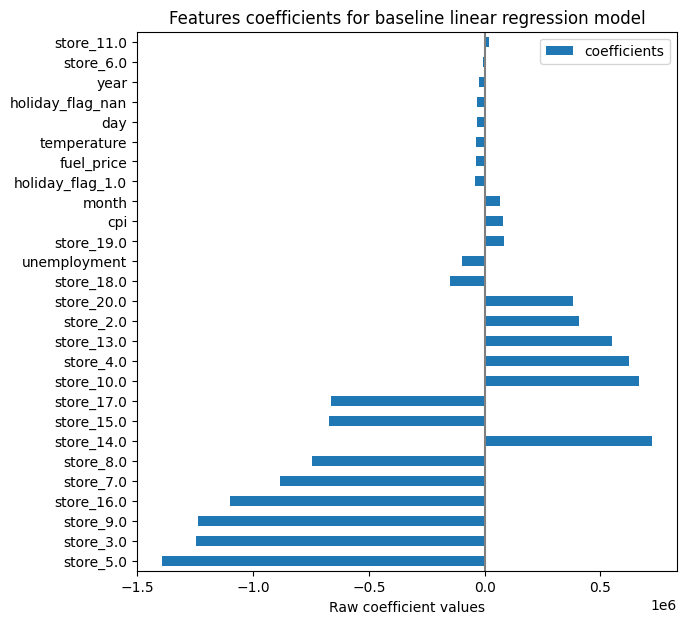

In [178]:
column_names = []
for name, pipeline, features_list in preprocessor.transformers_:
    if name == 'num':
        features = features_list
    else:
        features = pipeline.named_steps['encoder'].get_feature_names_out()
    column_names.extend(features)

coefs_ridge = pd.DataFrame(index = column_names, data = gridsearch_ridge.best_estimator_.coef_.transpose(), columns=["coefficients"])
coef_ridge_sorted = coefs_ridge.reindex(coefs['coefficients'].abs().sort_values(ascending=False).index)
coef_ridge_sorted.plot.barh(figsize=(9, 7))
plt.title("Features coefficients for baseline linear regression model")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

## 3.2. Lasso model

In [172]:
lasso = Lasso()

params = {
    'alpha': [1, 2, 3, 5, 10, 20, 30, 50]
}

gridsearch_lasso = GridSearchCV(lasso, param_grid = params, cv = 10, verbose=1)
gridsearch_lasso.fit(X_train, Y_train)

print("...Done.")
print("Best hyperparameters : ", gridsearch_lasso.best_params_)
print("Best R2 score : ", gridsearch_lasso.best_score_)
print("R2 score on training set : ", gridsearch_lasso.score(X_train, Y_train))
print("R2 score on test set : ", gridsearch_lasso.score(X_test, Y_test))

Fitting 10 folds for each of 8 candidates, totalling 80 fits
...Done.
Best hyperparameters :  {'alpha': 50}
Best R2 score :  0.9388510671971174
R2 score on training set :  0.9733143645724408
R2 score on test set :  0.9366425623974591


The Lasso model yields almost identical result.

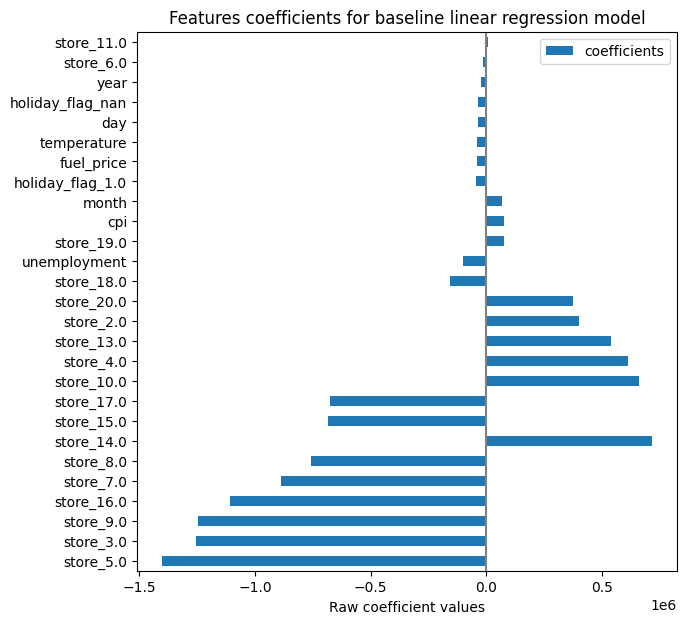

In [179]:
column_names = []
for name, pipeline, features_list in preprocessor.transformers_:
    if name == 'num':
        features = features_list
    else:
        features = pipeline.named_steps['encoder'].get_feature_names_out()
    column_names.extend(features)

coefs_lasso = pd.DataFrame(index = column_names, data = gridsearch_lasso.best_estimator_.coef_.transpose(), columns=["coefficients"])
coef_lasso_sorted = coefs_lasso.reindex(coefs['coefficients'].abs().sort_values(ascending=False).index)
coef_lasso_sorted.plot.barh(figsize=(9, 7))
plt.title("Features coefficients for baseline linear regression model")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

# Conclusion

We have explored the Walmart weekly sales dataset. After dropping unusable rows, removing outliers and cleaning our data, we preprocessed our dataset and trained a baseline linear regression model with a decent accuracy. In order to limit overfitting, we tried training Ridge and Lasso models, but they did not improve our model's performance.

In [180]:
# Last but not least : let's create our requirements.txt file for this notebook :
!pip3 freeze > requirements.txt